### Goal: Make IPL interesting for Vipul with the help of the data visualization(facts, trivia, stats, etc)
#### Constraints:
- Vipul doest have much time so graphs/plots should be easy to understand
- No additional data other than the provided
 

## Dependency

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno
import os
%matplotlib inline

In [3]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [4]:
plt.style.use('seaborn')

In [52]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
# read the data
df_bb = pd.read_csv("../../data/Ball_by_Ball.csv")
df_match = pd.read_csv("../../data/Match.csv")
df_player_match = pd.read_csv("../../data/Player_Match.csv")
df_player = pd.read_csv("../../data/Player.csv")
df_season = pd.read_csv("../../data/Season.csv")
df_team = pd.read_csv("../../data/Team.csv")

### **Venue Inspection**

In [6]:
df_match.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


#### 1. List of vanues

In [7]:
df_match.Venue_Name.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

#### Host Countries 

In [8]:
df_match.Host_Country.unique()

array(['India', 'South Africa', 'U.A.E'], dtype=object)

### City Name

In [9]:
df_match.City_Name.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Rajkot', 'Kanpur'], dtype=object)

In [10]:
df_match.City_Name.unique().__len__()

29

### Toss Result vs Match Result analysis

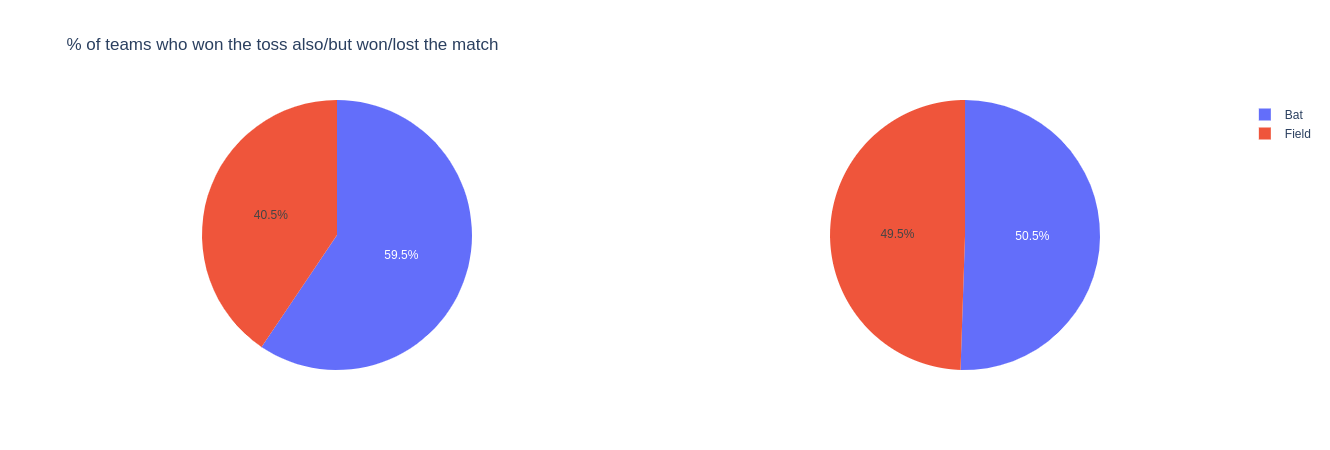

In [123]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

labels = ['Bat','Field']

values = df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id==df_match.Match_Winner_Id].Toss_Decision.value_counts().values

fig.add_trace(
    go.Pie(
        labels=labels, 
        values=df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id==df_match.Match_Winner_Id].Toss_Decision.value_counts().values,
#         hole=.5,
        name="Winners"
    ),
    1, 1
)
fig.add_trace(
    go.Pie(
        labels=labels, 
        values=df_match[df_match.IS_Result==1][df_match.Toss_Winner_Id!=df_match.Match_Winner_Id].Toss_Decision.value_counts().values, 
#         hole=.5,
        name="Loosers"
    ),
    1, 2
)
fig.update_layout(
    title_text="% of teams who won the toss also/but won/lost the match",
    # Add annotations in the center of the donut pies.
#     annotations=[dict(text='Won', x=0.20, y=0.5, font_size=16, showarrow=False),
#                  dict(text='Lost', x=0.80, y=0.5, font_size=16, showarrow=False)])
)
fig.show()

#### Most MOM awards

In [288]:
def get_names(idx):
    players = []
    for i in idx:
        players.append(df_player[df_player.Player_Id==i].Player_Name.values[0])
    return players

In [289]:
moms = df_match['Man_Of_The_Match_Id'].value_counts().values[:20]
idx = df_match['Man_Of_The_Match_Id'].value_counts().index[:20]

In [290]:
players=get_names(idx)

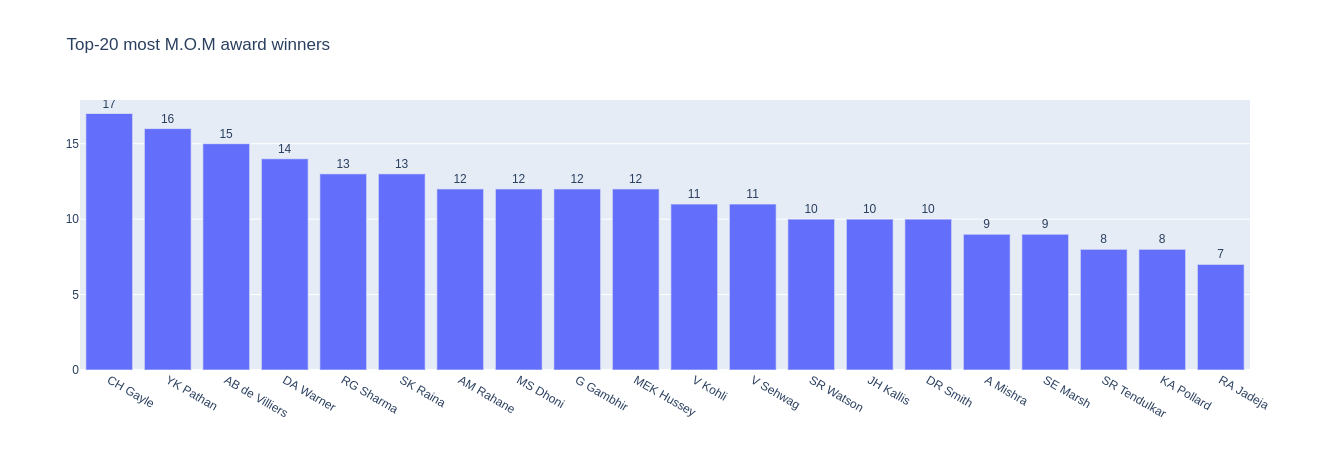

In [376]:
fig = go.Figure([go.Bar(x=players, y=moms, text=moms, textposition='outside')])
fig.update_layout(
    title="Top-20 most M.O.M award winners"
)
fig.update_layout()
fig.show()

In [378]:
print(players)
print(moms)

['CH Gayle', 'YK Pathan', 'AB de Villiers', 'DA Warner', 'RG Sharma', 'SK Raina', 'AM Rahane', 'MS Dhoni', 'G Gambhir', 'MEK Hussey', 'V Kohli', 'V Sehwag', 'SR Watson', 'JH Kallis', 'DR Smith', 'A Mishra', 'SE Marsh', 'SR Tendulkar', 'KA Pollard', 'RA Jadeja']
[17 16 15 14 13 13 12 12 12 12 11 11 10 10 10  9  9  8  8  7]


### Number of Victories by teams in each season (2008-2016)

In [295]:
def get_teams(ids):
    teams = []
    for _id in ids:
        teams.append(dfa_team.Team_Name[df_team.Team_Id==_id].values[0])
    return teams
def get_data(season):
    team_ids = df_match[df_match.Season_Id==season].Match_Winner_Id.value_counts().index.values
    teams = get_teams(team_ids)
    victories = df_match[df_match.Season_Id==season].Match_Winner_Id.value_counts().values
    return teams, victories


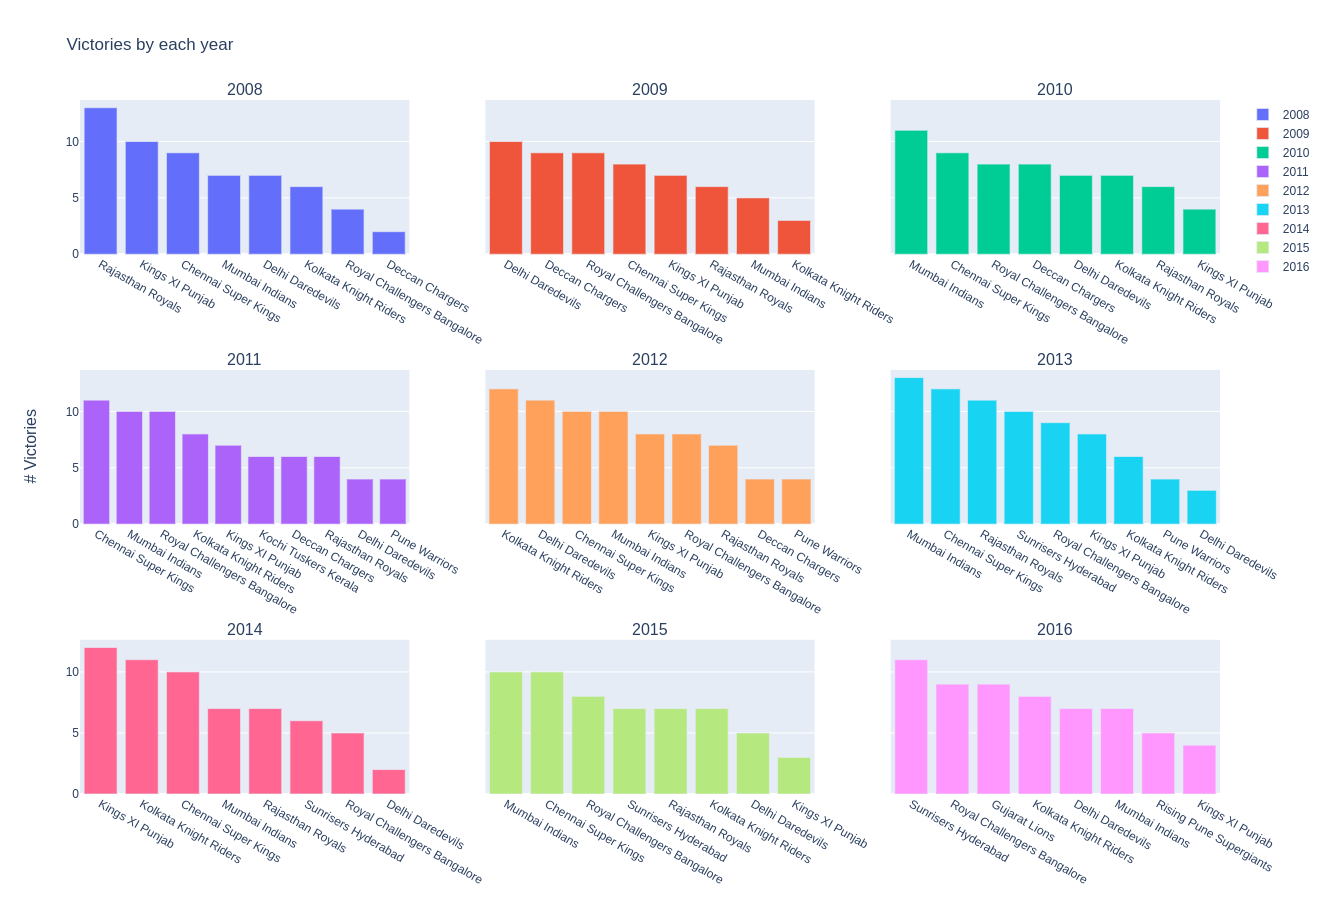

<Figure size 1728x864 with 0 Axes>

In [310]:
plt.figure(figsize=(24, 12))
fig = make_subplots(
    rows=3, 
    cols=3, 
    shared_xaxes=False,
    shared_yaxes=True,
#     x_title="Teams", 
    y_title="# Victories",
    subplot_titles=['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
)

for i, season in enumerate(df_match.Season_Id.unique()):
    teams, victories = get_data(season)

    row = (i//3)+1
    if season > 3:
        col = int(season - (row-1)*3)
    else:
        col = int(season)
    fig.add_trace(go.Bar(x=teams, y=victories,  name=str(2008+i)), row=row, col=col)
fig.update_layout(height=900, width=1300, title_text="Victories by each year")   
fig.show()

### ball-by-ball analysis

In [348]:
np.linspace(1, 7, 7)

array([1., 2., 3., 4., 5., 6., 7.])

#### Score analysis

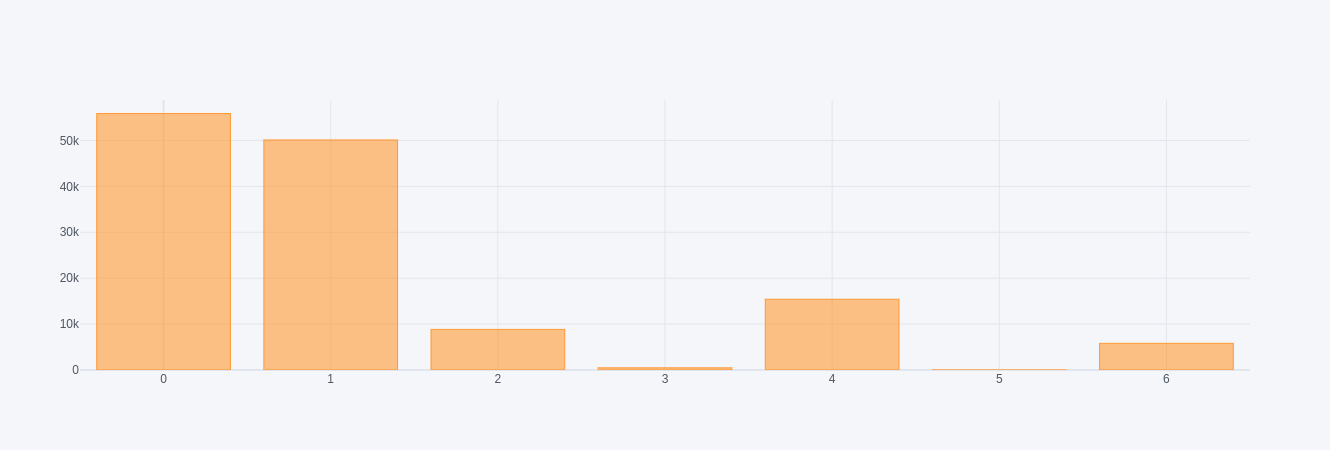

In [350]:
df_bb.Batsman_Scored.value_counts().iplot(kind="bar")

### Types of Dismissal and Frequency

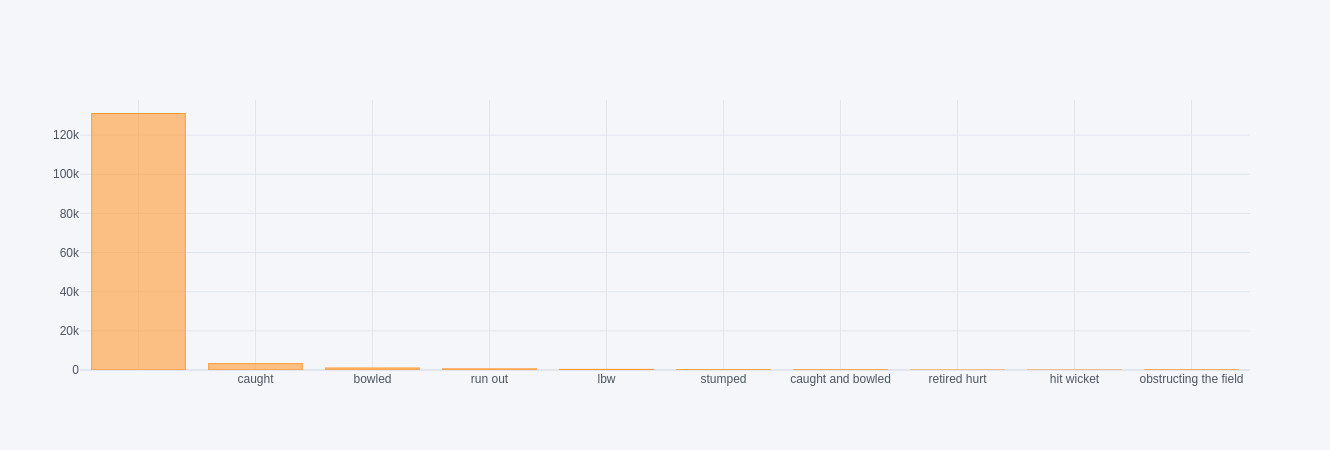

In [316]:
df_bb.Dissimal_Type.value_counts().iplot(kind="bar")

### Boundaries and Run Count

In [365]:
possible_runs = ['0', '1', '2', '3', '4', '5', '6']
boundaries = ['4', '6']

In [368]:
count_runs = sum(df_bb[df_bb.Batsman_Scored.isin(possible_runs)].Batsman_Scored.astype(int))
count_boundaries = df_bb[df_bb.Batsman_Scored.isin(boundaries)].Batsman_Scored.astype(int).values.shape[0]

In [375]:
print(f'total runs = {count_runs}\ntotal boundaries = {count_boundaries}\nTotal Balls Delivered = {df_bb.shape[0]}')

total runs = 165950
total boundaries = 21226
Total Balls Delivered = 136590
